In [68]:
import numpy as np
import pandas as pd
import sqlite3


In [69]:
con = sqlite3.connect('/Users/jacobcrawford/PycharmProjects/Learn_Web_Scraping/lotto_numbers')

In [70]:
sql_query = pd.read_sql('select date, first, second, third, fourth, fifth from lotto_numbers', con)

In [71]:
# convert sql to DataFrame
df = pd.DataFrame(sql_query, columns=["date", "first", "second", "third", "fourth", "fifth"])

In [72]:
con.close()

In [73]:
df.median(numeric_only=True)

first      6.0
second    14.0
third     23.0
fourth    31.0
fifth     40.0
dtype: float64

In [54]:
df.mean(numeric_only=True)

first      7.684554
second    15.179839
third     22.919163
fourth    30.441209
fifth     38.056295
dtype: float64

In [74]:
y = df['fourth']

In [75]:
x = df[['first', 'second', 'third', 'fifth']]

In [76]:
y.shape

(7212,)

In [77]:
x.shape

(7212, 4)

In [78]:
from sklearn.model_selection  import train_test_split

In [79]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
lm = LinearRegression()

In [82]:
lm.fit(X_train,y_train)

LinearRegression()

In [83]:
predictions = lm.predict(X_test)

In [84]:
predictions_as_ints = []
for i in predictions:
    predictions_as_ints.append(i.round())

In [64]:
con.close()

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions_as_ints)

In [86]:
accuracy

0.1122920517560074

In [87]:
x.shape

(7212, 4)

In [92]:
y.shape

(7212,)

In [88]:
##### PCA RESEARCH  model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [89]:
df_numbers = df.drop(['date'], axis=1)

In [90]:
df_numbers.head()

,first,second,third,fourth,fifth
0,12,17,20,22,35
1,11,13,20,24,38
2,3,5,12,18,32
3,3,5,12,16,29
4,20,29,35,36,37


In [91]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=5)

In [25]:
pca.fit(df_numbers)

PCA(n_components=5)

In [26]:
x_pca = pca.transform(df_numbers)

In [27]:
x_pca[:9]

array([[ -4.76318326,   8.70816973,   2.50071763,   1.39386835,
         -2.08229   ],
       [ -5.07284577,   3.71153311,   3.63271918,   0.23721458,
         -3.60493773],
       [-20.7395449 ,   1.40829346,   0.38922392,   0.39664545,
         -1.9605699 ],
       [-22.67134117,   3.85986871,  -1.37687562,   0.06992263,
         -2.13969733],
       [ 19.71281773,  11.20320422,  -1.02823492,  -2.24265903,
         -0.66019959],
       [ -8.09931971,   8.69382042,  -0.65776901,  -2.3909913 ,
         -0.82977763],
       [-11.28951976,  -6.47979463,  -4.39898996,  -1.29087354,
         -5.2317132 ],
       [ 11.54906977,   7.97327146,  -0.35044323,   4.62903285,
          1.62916771],
       [  1.32318133,   2.9373612 ,   0.41373683,  -2.58747026,
          3.95487731]])

In [28]:
x_pca.shape

(7212, 5)

Text(0, 0.5, 'Second Principal Component')

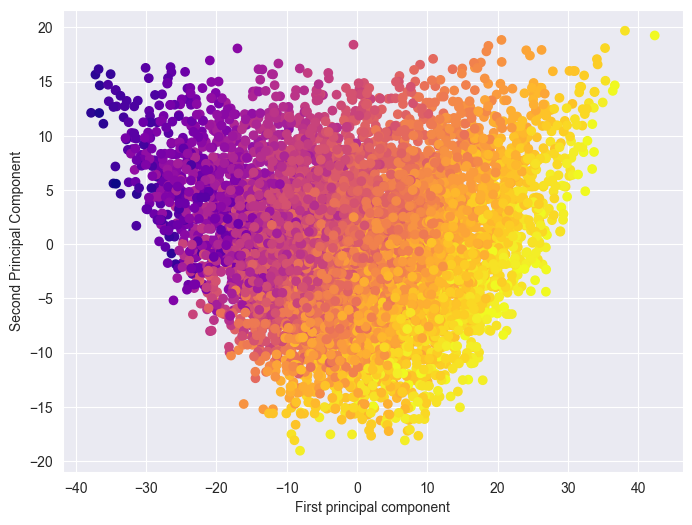

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=df_numbers['fourth'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [30]:
pca.components_

array([[ 0.28875855,  0.48817506,  0.57107677,  0.5095118 ,  0.30425755],
       [ 0.51572184,  0.50733489, -0.00308489, -0.47669226, -0.49939691],
       [ 0.52858257,  0.02637885, -0.58023207, -0.04326931,  0.61754605],
       [-0.53179187,  0.50379212,  0.05371821, -0.50931206,  0.44844898],
       [-0.29740101,  0.49979404, -0.57819279,  0.50188764, -0.27488261]])

In [31]:
df_comp = pd.DataFrame(pca.components_,columns=df_numbers.columns)

<Axes: >

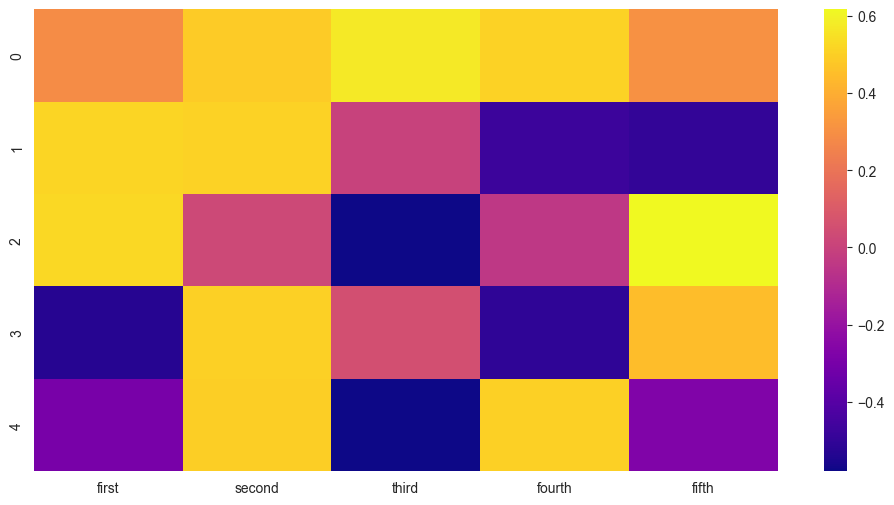

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [33]:
df_comp

,first,second,third,fourth,fifth
0,0.288759,0.488175,0.571077,0.509512,0.304258
1,0.515722,0.507335,-0.003085,-0.476692,-0.499397
2,0.528583,0.026379,-0.580232,-0.043269,0.617546
3,-0.531792,0.503792,0.053718,-0.509312,0.448449
4,-0.297401,0.499794,-0.578193,0.501888,-0.274883


In [34]:
df_numbers.describe()

,first,second,third,fourth,fifth
count,7212.000000,7212.000000,7212.000000,7212.000000,7212.000000
mean,7.684554,15.179839,22.919163,30.441209,38.056295
std,6.044229,7.563990,8.058842,7.716029,6.177596
min,1.000000,2.000000,3.000000,5.000000,9.000000
25%,3.000000,9.000000,17.000000,25.000000,35.000000
50%,6.000000,14.000000,23.000000,31.000000,40.000000
75%,11.000000,20.000000,29.000000,37.000000,43.000000
max,38.000000,42.000000,43.000000,44.000000,45.000000


In [35]:
df_comp.describe()

,first,second,third,fourth,fifth
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.100774,0.405095,-0.107343,-0.003575,0.119195
std,0.487140,0.211831,0.485383,0.499984,0.481914
min,-0.531792,0.026379,-0.580232,-0.509312,-0.499397
25%,-0.297401,0.488175,-0.578193,-0.476692,-0.274883
50%,0.288759,0.499794,-0.003085,-0.043269,0.304258
75%,0.515722,0.503792,0.053718,0.501888,0.448449
max,0.528583,0.507335,0.571077,0.509512,0.617546


In [36]:
X_train.head()


,first,second,third,fifth
4446,6,17,18,45
5238,4,12,20,43
6353,1,20,23,41
5499,5,8,20,32
3413,7,10,12,44


In [37]:
df.head()

,date,first,second,third,fourth,fifth
0,"Jan 19, 2014",12,17,20,22,35
1,"Jan 19, 2014",11,13,20,24,38
2,"Jan 20, 2014",3,5,12,18,32
3,"Jan 20, 2014",3,5,12,16,29
4,"Jan 21, 2014",20,29,35,36,37


In [38]:
x 

,first,second,third,fifth
0,12,17,20,35
1,11,13,20,38
2,3,5,12,32
3,3,5,12,29
4,20,29,35,37
...,...,...,...,...
7207,7,8,12,20
7208,2,4,8,16
7209,7,19,27,44
7210,8,13,14,29


In [39]:
xx = df[['third']]

In [40]:
y

0       22
1       24
2       18
3       16
4       36
        ..
7207    16
7208    15
7209    42
7210    21
7211    35
Name: fourth, Length: 7212, dtype: int64

In [41]:
lm2 = LinearRegression()

In [42]:
lm2.fit(xx,y)

LinearRegression()

In [43]:
predictions2 = lm2.predict(xx)
predictions2[:9]

array([28.4263643 , 28.4263643 , 22.90465788, 22.90465788, 38.77956384,
       27.736151  , 29.80679091, 34.63828402, 29.1165776 ])

In [44]:
accruacy2 = accuracy_score(y, predictions2.round())

In [45]:
accruacy2

0.07251802551303384

In [46]:
df_numbers.head()

,first,second,third,fourth,fifth
0,12,17,20,22,35
1,11,13,20,24,38
2,3,5,12,18,32
3,3,5,12,16,29
4,20,29,35,36,37


In [47]:
df_long = df_numbers.transpose()

In [48]:
df_long.head()

,0,1,2,3,4,5,6,7,8,9,...,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211
first,12,11,3,3,20,11,1,12,10,9,...,2,6,33,20,11,7,2,7,8,4
second,17,13,5,5,29,14,3,28,18,11,...,12,10,39,21,16,8,4,19,13,18
third,20,20,12,12,35,19,22,29,21,13,...,21,11,40,24,20,12,8,27,14,33
fourth,22,24,18,16,36,23,26,31,33,19,...,32,13,41,33,38,16,15,42,21,35
fifth,35,38,32,29,37,30,36,39,35,20,...,33,44,42,37,41,20,16,44,29,36


In [49]:
df_long.describe()

,0,1,2,3,4,5,6,7,8,9,...,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211
count,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,21.20000,21.200000,14.000000,13.000000,31.400000,19.400000,17.600000,27.800000,23.400000,14.400000,...,20.000000,16.800000,39.000000,27.000000,25.200000,12.600000,9.000000,27.800000,17.000000,25.200000
std,8.58487,10.756393,11.683321,10.368221,7.092249,7.503333,15.142655,9.833616,10.502381,4.878524,...,13.247641,15.417522,3.535534,7.582875,13.479614,5.458938,6.324555,15.610894,8.154753,13.917615
min,12.00000,11.000000,3.000000,3.000000,20.000000,11.000000,1.000000,12.000000,10.000000,9.000000,...,2.000000,6.000000,33.000000,20.000000,11.000000,7.000000,2.000000,7.000000,8.000000,4.000000
25%,17.00000,13.000000,5.000000,5.000000,29.000000,14.000000,3.000000,28.000000,18.000000,11.000000,...,12.000000,10.000000,39.000000,21.000000,16.000000,8.000000,4.000000,19.000000,13.000000,18.000000
50%,20.00000,20.000000,12.000000,12.000000,35.000000,19.000000,22.000000,29.000000,21.000000,13.000000,...,21.000000,11.000000,40.000000,24.000000,20.000000,12.000000,8.000000,27.000000,14.000000,33.000000
75%,22.00000,24.000000,18.000000,16.000000,36.000000,23.000000,26.000000,31.000000,33.000000,19.000000,...,32.000000,13.000000,41.000000,33.000000,38.000000,16.000000,15.000000,42.000000,21.000000,35.000000
max,35.00000,38.000000,32.000000,29.000000,37.000000,30.000000,36.000000,39.000000,35.000000,20.000000,...,33.000000,44.000000,42.000000,37.000000,41.000000,20.000000,16.000000,44.000000,29.000000,36.000000


In [50]:
xx  = df_long.drop('7183', axis=1, inplace=True)

KeyError: "['7183'] not found in axis"

In [ ]:
xx = df_long.columns.values

In [ ]:
xx.shape

In [ ]:
yy = df_long[[7183], =1].values

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
